# Modelo de mezclas Gaussianas
Ejemplo de implementación del modelo de mezclas Gausssianas (GMM) utilizando el conjunto de datos Iris.

### Conjunto de Datos

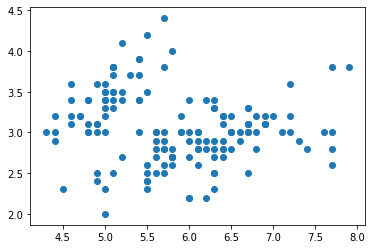

In [2]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

datos = load_iris()

plt.scatter(datos.data[:,0],datos.data[:,1])

### Creación del modelo GMM
Se utilizan las primeras dos características del conjunto de datos

In [10]:
# Crear modelo con sklearn
X = datos.data[:,0:2]

from sklearn.mixture import GaussianMixture

modelo = GaussianMixture (n_components = 3, covariance_type = 'full')
modelo.fit(X)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=3, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

### Inspección del modelo GMM

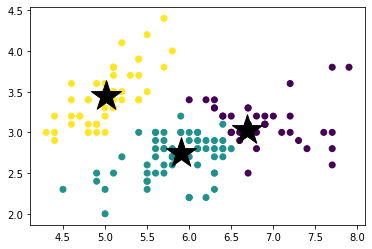

In [11]:
# Obtiene las etiquetas que especifican a qué grupo pertenecen los datos de X
y = modelo.predict(X)

# Obtiene las coordenadas de las medias
C = modelo.means_

# Grafica los datos agrupados
plt.scatter(X[:,0],X[:,1],c=y)
plt.scatter(C[:,0],C[:,1],marker='*',color = 'black', s = 1000)

### Función modificada de: 
https://scikit-learn.org/stable/auto_examples/mixture/plot_gmm.html#sphx-glr-auto-examples-mixture-plot-gmm-py

In [13]:
def plot_results(X, Y_, means, covariances):
    import itertools
    from scipy import linalg
    import numpy as np
    import matplotlib as mpl
    color_iter = itertools.cycle(['navy', 'c', 'cornflowerblue', 'gold','darkorange'])
    splot = plt.subplot(1, 1, 1)
    for i, (mean, covar, color) in enumerate(zip(
            means, covariances, color_iter)):
        v, w = linalg.eigh(covar)
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        u = w[0] / linalg.norm(w[0])
        # as the DP will not use every component it has access to
        # unless it needs it, we shouldn't plot the redundant
        # components.
        if not np.any(Y_ == i):
            continue
        plt.scatter(X[Y_ == i, 0], X[Y_ == i, 1], color=color, s= 50)

        # Plot an ellipse to show the Gaussian component
        angle = np.arctan(u[1] / u[0])
        angle = 180. * angle / np.pi  # convert to degrees
        ell = mpl.patches.Ellipse(mean, v[0], v[1], 180. + angle, color=color)
        ell.set_clip_box(splot.bbox)
        ell.set_alpha(0.5)
        splot.add_artist(ell)

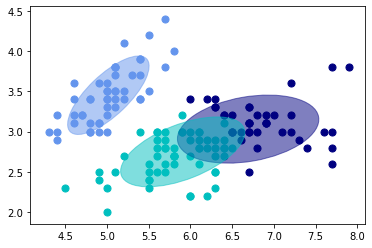

In [15]:
plot_results(X,modelo.predict(X), modelo.means_, modelo.covariances_)

### Predicción de nuevos elementos

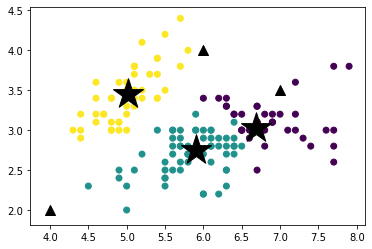

In [16]:
# Datos de prueba (originalmente no están en el conjunto de datos)
import numpy as np
Xp = np.array([[4,2],[6,4],[7,3.5]])

# Grafica los datos junto con los grupos obtenidos previamente
plt.scatter(X[:,0],X[:,1],c=y)
plt.scatter(C[:,0],C[:,1],marker='*',color = 'black', s = 1000)

plt.scatter(Xp[:,0],Xp[:,1],color = 'black', marker = '^', s = 100)

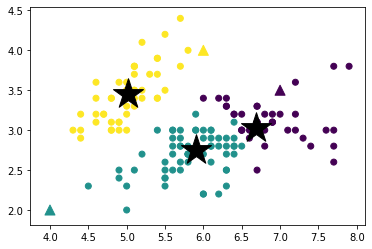

In [17]:
# Predice el grupo al que pertenecen
yp = modelo.predict(Xp)

# Grafica la predicción
plt.scatter(X[:,0],X[:,1],c=y)
plt.scatter(C[:,0],C[:,1],marker='*',color = 'black', s = 1000)

plt.scatter(Xp[:,0],Xp[:,1],c=yp, marker = '^', s = 100)

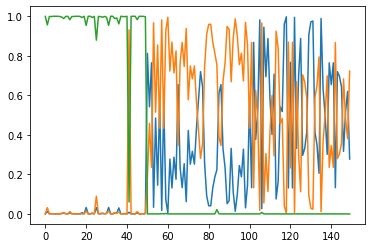

In [18]:
y_prob = modelo.predict_proba(X)

plt.plot(y_prob[:,0]) #probabilidad de los elementos a donde pertenecen 
plt.plot(y_prob[:,1]) 
plt.plot(y_prob[:,2])